# Factors Contributing to Happiness Across Continents

Author: 
## Fernando Alexander

#### Objective: 
Analyze global happiness levels and identify key factors contributing to these levels across different continents.

#### Data Sources: 
Primarily the World Happiness Report, supplemented by additional datasets as needed for specific variables like GDP, health data, and social metrics.

#### Methodology: 
Begin with a broad analysis to identify general trends and then narrow down to continent-specific insights. Utilize statistical tools and machine learning models for in-depth analysis.

#### Expected Outcomes: 
Determine significant predictors of happiness, compare happiness scores across continents, and possibly propose actions for improving happiness based on identified factors.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
pd.set_option('display.max_columns', None)
gdp = pd.read_csv('GDP.csv')
happiness = pd.read_csv('World Happiness 2023 DataForTable(Sheet1).csv')
wellbeing = pd.read_csv('OECD.WISE.Current well-being 2020 to 2023..csv')
life_exp = pd.read_csv('OECD.ELS Life Expentancy 2020 to 2022.csv')

## Inspect Data

In [90]:
gdp.head()

,Unnamed: 0,Gross domestic product 2022,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN
2,NaN,Ranking,NaN,Economy,US dollars),NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"25,439,700",NaN


In [91]:
happiness.tail(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2189,Zimbabwe,2013,4.690,7.755,0.799,48.800,0.576,-0.089,0.831,0.624,0.182
2190,Zimbabwe,2014,4.184,7.748,0.766,50.000,0.642,-0.058,0.820,0.661,0.239
2191,Zimbabwe,2015,3.703,7.747,0.736,51.200,0.667,-0.107,0.810,0.639,0.179
2192,Zimbabwe,2016,3.735,7.735,0.768,51.675,0.733,-0.079,0.724,0.685,0.209
2193,Zimbabwe,2017,3.638,7.754,0.754,52.150,0.753,-0.081,0.751,0.734,0.224
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242
2198,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.070,0.753,0.641,0.191


In [92]:
wellbeing.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,AGE,Age,SEX,Sex,EDUCATION_LEV,Education level,DOMAIN,Domain,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals,BASE_PER,Base period
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.0),Current well-being,I,CZE,Czechia,2_3,Long-term unemployment rate,PT_LF,Percentage of labour force,_T,Total,_T,Total,_T,Total,HSL_2,Work and job quality,2021,NaN,0.812708,NaN,B,Time series break,0,Units,2,Two,NaN,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.0),Current well-being,I,JPN,Japan,10_3,Road deaths,DT,Deaths,_T,Total,_T,Total,_T,Total,HSL_10,Safety,2020,NaN,2.707952,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.0),Current well-being,I,JPN,Japan,10_3,Road deaths,DT,Deaths,_T,Total,_T,Total,_T,Total,HSL_10,Safety,2022,NaN,2.573891,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.0),Current well-being,I,SVK,Slovak Republic,11_2,Negative affect balance,PT_POP_Y_GE15,Percentage of population aged 15 years or over,_T,Total,_T,Total,_T,Total,HSL_11,Subjective well-being,2020,NaN,13.302880,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.0),Current well-being,I,CHL,Chile,10_3,Road deaths,DT,Deaths,_T,Total,_T,Total,_T,Total,HSL_10,Safety,2020,NaN,9.219711,NaN,E,Estimated value,0,Units,2,Two,NaN,NaN


In [93]:
life_exp.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,UNIT_MEASURE,Unit of measure,AGE,Age,SEX,Sex,SOCIO_ECON_STATUS,Socio-economic status,DEATH_CAUSE,Cause of death,CALC_METHODOLOGY,Calculation methodology,GESTATION_THRESHOLD,Gestation period threshold,HEALTH_STATUS,Health status,DISEASE,Disease,CANCER_SITE,Cancer site,TIME_PERIOD,Time period,OBS_VALUE,Observation value,DECIMALS,Decimals,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3,UNIT_MULT,Unit multiplier
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_HEALTH_STATUS(1.0),Health status,I,HUN,Hungary,A,Annual,LFEXP,Life expectancy,Y,Years,Y0,0 years,_T,Total,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2022,NaN,76.2,NaN,NaN,NaN,P,Provisional value,NaN,NaN,NaN,NaN,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_HEALTH_STATUS(1.0),Health status,I,HUN,Hungary,A,Annual,LFEXP,Life expectancy,Y,Years,Y0,0 years,F,Female,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2022,NaN,79.5,NaN,NaN,NaN,P,Provisional value,NaN,NaN,NaN,NaN,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_HEALTH_STATUS(1.0),Health status,I,ISR,Israel,A,Annual,LFEXP,Life expectancy,Y,Years,Y0,0 years,_T,Total,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2022,NaN,82.9,NaN,NaN,NaN,E,Estimated value,NaN,NaN,NaN,NaN,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_HEALTH_STATUS(1.0),Health status,I,JPN,Japan,A,Annual,LFEXP,Life expectancy,Y,Years,Y0,0 years,_T,Total,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2021,NaN,84.5,NaN,NaN,NaN,E,Estimated value,NaN,NaN,NaN,NaN,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_HEALTH_STATUS(1.0),Health status,I,DEU,Germany,A,Annual,LFEXP,Life expectancy,Y,Years,Y0,0 years,_T,Total,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2021,NaN,80.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning and Preparing Data

1. Choosing relevant data from each df
2. Handle Missing Values

In [94]:
gdp_cleaned = gdp.iloc[4:].reset_index(drop=True)
gdp_cleaned.columns = ['CountryCode', 'Ranking', 'NaN1', 'Country', 'GDP(millions)', 'NaN2']
gdp_cleaned = gdp_cleaned.drop(columns=['NaN1','NaN2'])
gdp_cleaned.head()

,CountryCode,Ranking,Country,GDP(millions)
0,USA,1,United States,"25,439,700"
1,CHN,2,China,"17,963,171"
2,JPN,3,Japan,"4,256,411"
3,DEU,4,Germany,"4,082,469"
4,IND,5,India,"3,416,646"


In [95]:
gdp_cleaned.shape

(325, 4)

In [96]:
happiness.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [97]:
happiness.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64

In [98]:
happiness.shape

(2199, 11)

In [99]:
happiness_2020_to_2023 = happiness[(happiness['year'] >= 2020) & (happiness['year']<=2023)]
happiness_2020_to_2023['year'].unique()

array([2021, 2022, 2020])

In [100]:
happiness_2020_to_2023.isna().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  10
Social support                       0
Healthy life expectancy at birth     9
Freedom to make life choices         3
Generosity                          10
Perceptions of corruption           12
Positive affect                      1
Negative affect                      1
dtype: int64

In [101]:
happiness_2020_to_2023.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
12,Afghanistan,2021,2.436,7.324,0.454,54.550,0.394,-0.081,0.946,0.179,0.607
13,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,0.206,0.576
26,Albania,2020,5.365,9.492,0.710,69.125,0.754,0.004,0.891,0.563,0.265
27,Albania,2021,5.255,9.583,0.702,69.150,0.827,0.041,0.896,0.554,0.254
28,Albania,2022,5.212,9.626,0.724,69.175,0.802,-0.066,0.846,0.547,0.255


In [102]:
happines_drop = happiness_2020_to_2023.drop(columns= ['Positive affect', 'Negative affect'])
happines_drop.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
12,Afghanistan,2021,2.436,7.324,0.454,54.550,0.394,-0.081,0.946
13,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733
26,Albania,2020,5.365,9.492,0.710,69.125,0.754,0.004,0.891
27,Albania,2021,5.255,9.583,0.702,69.150,0.827,0.041,0.896
28,Albania,2022,5.212,9.626,0.724,69.175,0.802,-0.066,0.846


In [103]:
wellbeing['TIME_PERIOD'].unique()

array([2021, 2020, 2022])

In [104]:
wellbeing.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,AGE,Age,SEX,Sex,EDUCATION_LEV,Education level,DOMAIN,Domain,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals,BASE_PER,Base period
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.0),Current well-being,I,CZE,Czechia,2_3,Long-term unemployment rate,PT_LF,Percentage of labour force,_T,Total,_T,Total,_T,Total,HSL_2,Work and job quality,2021,NaN,0.812708,NaN,B,Time series break,0,Units,2,Two,NaN,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.0),Current well-being,I,JPN,Japan,10_3,Road deaths,DT,Deaths,_T,Total,_T,Total,_T,Total,HSL_10,Safety,2020,NaN,2.707952,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.0),Current well-being,I,JPN,Japan,10_3,Road deaths,DT,Deaths,_T,Total,_T,Total,_T,Total,HSL_10,Safety,2022,NaN,2.573891,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.0),Current well-being,I,SVK,Slovak Republic,11_2,Negative affect balance,PT_POP_Y_GE15,Percentage of population aged 15 years or over,_T,Total,_T,Total,_T,Total,HSL_11,Subjective well-being,2020,NaN,13.302880,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.0),Current well-being,I,CHL,Chile,10_3,Road deaths,DT,Deaths,_T,Total,_T,Total,_T,Total,HSL_10,Safety,2020,NaN,9.219711,NaN,E,Estimated value,0,Units,2,Two,NaN,NaN


In [105]:
wellbeing_cleaned = wellbeing[['REF_AREA', 'Reference area', 'TIME_PERIOD', 'OBS_VALUE', 'MEASURE']].rename(columns={
    'REF_AREA': 'CountryCode',
    'Reference area': 'Country',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Observation Value',
    'MEASURE': 'Measure'
})

In [106]:
wellbeing_cleaned.isna().sum()

CountryCode          0
Country              0
Year                 0
Observation Value    0
Measure              0
dtype: int64

In [107]:
life_exp.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,UNIT_MEASURE,Unit of measure,AGE,Age,SEX,Sex,SOCIO_ECON_STATUS,Socio-economic status,DEATH_CAUSE,Cause of death,CALC_METHODOLOGY,Calculation methodology,GESTATION_THRESHOLD,Gestation period threshold,HEALTH_STATUS,Health status,DISEASE,Disease,CANCER_SITE,Cancer site,TIME_PERIOD,Time period,OBS_VALUE,Observation value,DECIMALS,Decimals,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3,UNIT_MULT,Unit multiplier
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_HEALTH_STATUS(1.0),Health status,I,HUN,Hungary,A,Annual,LFEXP,Life expectancy,Y,Years,Y0,0 years,_T,Total,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2022,NaN,76.2,NaN,NaN,NaN,P,Provisional value,NaN,NaN,NaN,NaN,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_HEALTH_STATUS(1.0),Health status,I,HUN,Hungary,A,Annual,LFEXP,Life expectancy,Y,Years,Y0,0 years,F,Female,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2022,NaN,79.5,NaN,NaN,NaN,P,Provisional value,NaN,NaN,NaN,NaN,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_HEALTH_STATUS(1.0),Health status,I,ISR,Israel,A,Annual,LFEXP,Life expectancy,Y,Years,Y0,0 years,_T,Total,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2022,NaN,82.9,NaN,NaN,NaN,E,Estimated value,NaN,NaN,NaN,NaN,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_HEALTH_STATUS(1.0),Health status,I,JPN,Japan,A,Annual,LFEXP,Life expectancy,Y,Years,Y0,0 years,_T,Total,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2021,NaN,84.5,NaN,NaN,NaN,E,Estimated value,NaN,NaN,NaN,NaN,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_HEALTH_STATUS(1.0),Health status,I,DEU,Germany,A,Annual,LFEXP,Life expectancy,Y,Years,Y0,0 years,_T,Total,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,_Z,Not applicable,2021,NaN,80.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
life_exp_cleaned = life_exp[['REF_AREA', 'Reference area', 'TIME_PERIOD', 'OBS_VALUE', ]].rename(columns ={
    'REF_AREA': 'CountryCode',
    'Reference area': 'Country',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Life expentancy'})

life_exp_cleaned.head(), life_exp_cleaned.shape                                                                                              
                                                                                            

(  CountryCode  Country  Year  Life expentancy
 0         HUN  Hungary  2022             76.2
 1         HUN  Hungary  2022             79.5
 2         ISR   Israel  2022             82.9
 3         JPN    Japan  2021             84.5
 4         DEU  Germany  2021             80.8,
 (391, 4))

In [109]:
happiness_cleaned = happines_drop
happiness_cleaned

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
12,Afghanistan,2021,2.436,7.324,0.454,54.550,0.394,-0.081,0.946
13,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733
26,Albania,2020,5.365,9.492,0.710,69.125,0.754,0.004,0.891
27,Albania,2021,5.255,9.583,0.702,69.150,0.827,0.041,0.896
28,Albania,2022,5.212,9.626,0.724,69.175,0.802,-0.066,0.846
...,...,...,...,...,...,...,...,...,...
2180,Zambia,2020,4.838,8.066,0.767,54.825,0.750,0.058,0.810
2181,Zambia,2021,3.082,8.082,0.619,55.250,0.833,0.141,0.824
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757


In [110]:
life_exp_cleaned.columns

Index(['CountryCode', 'Country', 'Year', 'Life expentancy'], dtype='object')

## Correlation Analysis:

### Objective: 
Understand the relationships between different variables and happiness scores. 

In [111]:
happiness_numeric = happiness_cleaned.select_dtypes(include=['float64', 'int64'])
happiness_numeric.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
year,1.000000,-0.050845,-0.040524,-0.077987,-0.018892,-0.070679,0.090880,-0.011612
Life Ladder,-0.050845,1.000000,0.786579,0.817684,0.723031,0.602509,0.067329,-0.470981
Log GDP per capita,-0.040524,0.786579,1.000000,0.753965,0.858507,0.365956,-0.093092,-0.438367
Social support,-0.077987,0.817684,0.753965,1.000000,0.705395,0.469724,0.060415,-0.268745
Healthy life expectancy at birth,-0.018892,0.723031,0.858507,0.705395,1.000000,0.391729,-0.101222,-0.368188
Freedom to make life choices,-0.070679,0.602509,0.365956,0.469724,0.391729,1.000000,0.206079,-0.385977
Generosity,0.090880,0.067329,-0.093092,0.060415,-0.101222,0.206079,1.000000,-0.149631
Perceptions of corruption,-0.011612,-0.470981,-0.438367,-0.268745,-0.368188,-0.385977,-0.149631,1.000000


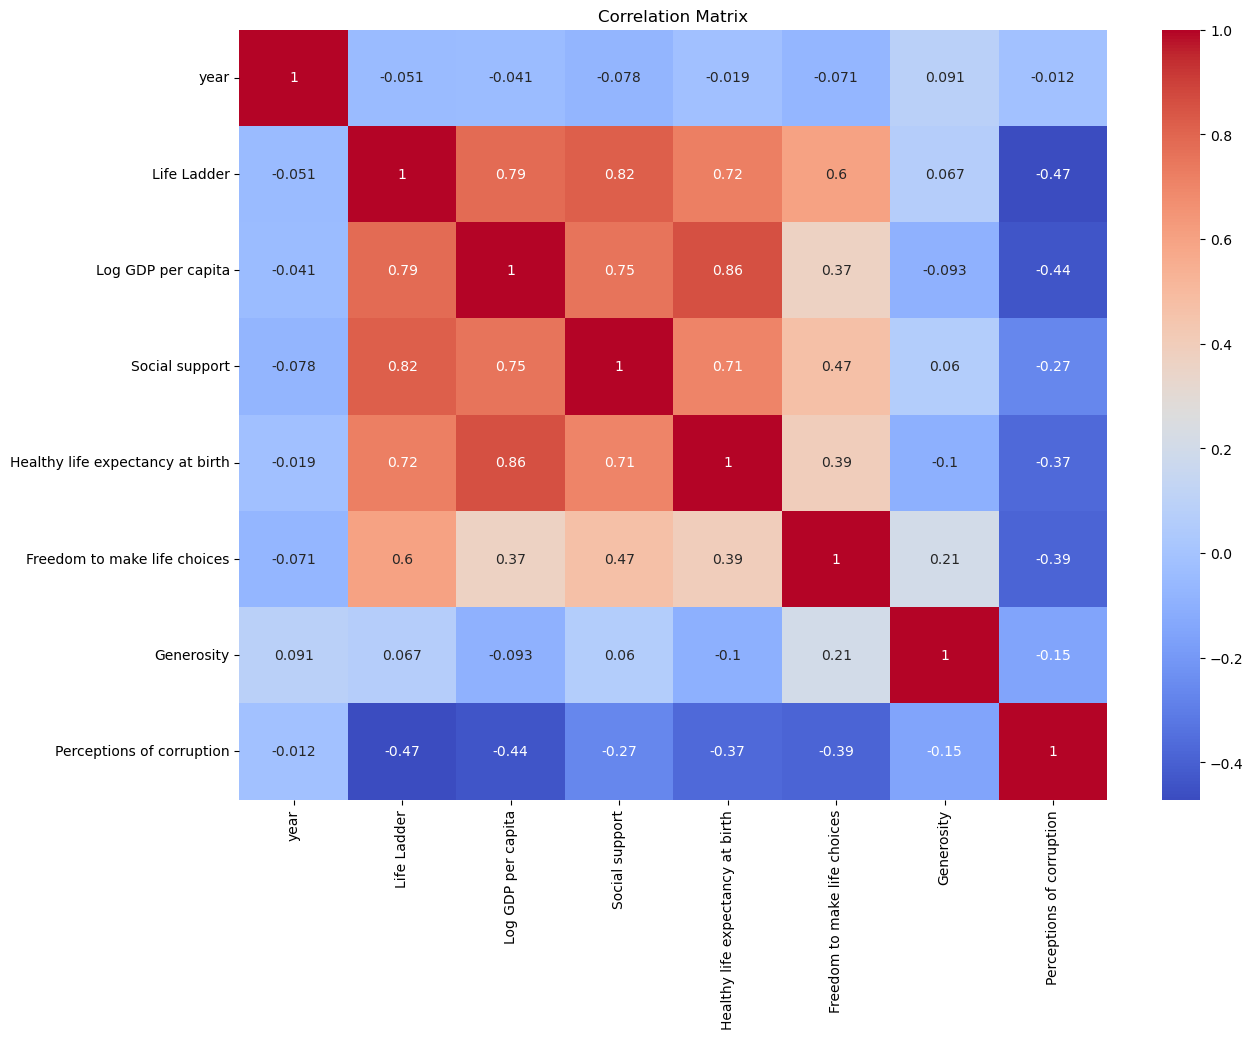

In [112]:
correlation_matrix = happiness_numeric.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Interpreting the Correlation Matrix
"happines_cleaned"
### Life Ladder (Subjective measure of happiness or well-being) 

- Positive : GDP per capita, Social Support, Healthy life expectancy at birth.
- Modeate: Freedom to make choices
- Negative: Perception of corruption

### GDP per capita

- Positive: Social Support, Healthy life expectancy at birth
- Negative: Perception of corruption

### Social Support

- Positive: Healthy life expectancy at birth
- Moderate: Freedom to make choices

# Trend Analysis

### Objective:
Examine trends in happiness scores, GDP, and life expectancy over the years to identify patterns and changes over time.

## Identify the 10 happiest and least happy countries.

In [113]:
happiness_avg = happiness_cleaned.groupby('Country name')['Life Ladder'].mean().reset_index()

happiest_countries = happiness_avg.nlargest(10, 'Life Ladder')
least_happy_countries = happiness_avg.nsmallest(10, 'Life Ladder')

print('Happiest Countries:\n', happiest_countries)
print('\n')
print('Least Happy Countirs:\n', least_happy_countries)

Happiest Countries:
     Country name  Life Ladder
38       Finland     7.804000
31       Denmark     7.586333
51       Iceland     7.529667
57        Israel     7.478333
89   Netherlands     7.402667
117       Sweden     7.394667
95        Norway     7.315667
118  Switzerland     7.240000
72    Luxembourg     7.228000
90   New Zealand     7.123000


Least Happy Countirs:
          Country name  Life Ladder
0         Afghanistan     1.858500
69            Lebanon     2.388333
108      Sierra Leone     3.137000
136          Zimbabwe     3.203667
26   Congo (Kinshasa)     3.207000
13           Botswana     3.435000
74             Malawi     3.495500
24            Comoros     3.545000
121          Tanzania     3.694333
52              India     3.904000


In [114]:
happiest_subset = happiness_cleaned[happiness_cleaned['Country name'].isin(happiest_countries['Country name'])]
least_happy_subset = happiness_cleaned[happiness_cleaned['Country name'].isin(least_happy_countries['Country name'])]

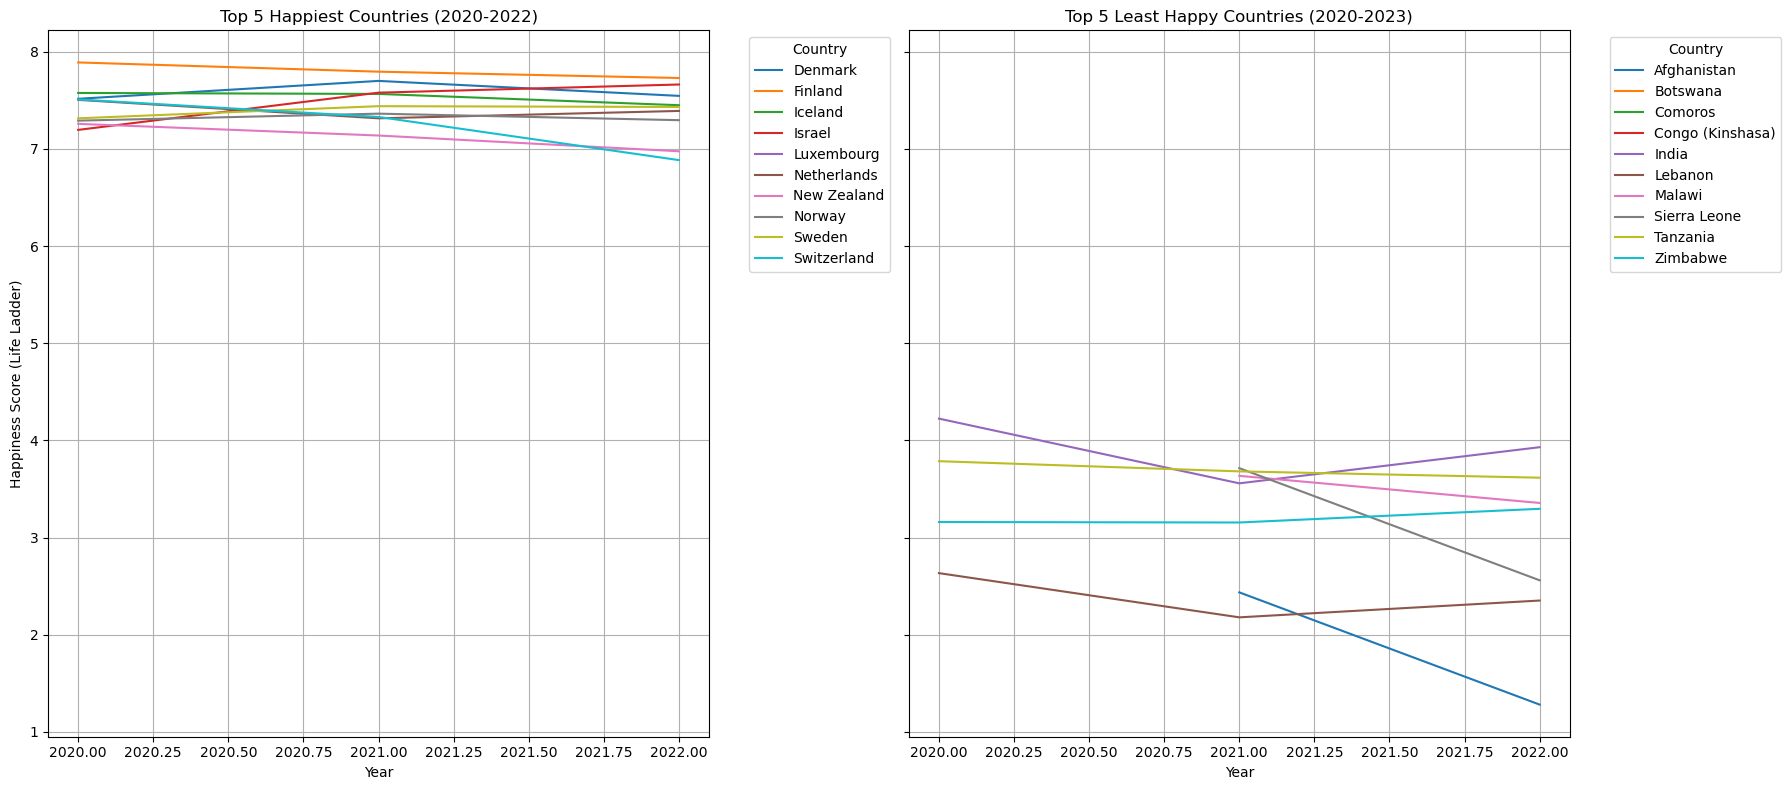

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plot for the happiest countries
sns.lineplot(data=happiest_subset, x='year', y='Life Ladder', hue='Country name', ax=axes[0])
axes[0].set_title('Top 5 Happiest Countries (2020-2022)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Happiness Score (Life Ladder)')
axes[0].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True)

# Plot for the least happy countries
sns.lineplot(data=least_happy_subset, x='year', y='Life Ladder', hue='Country name', ax=axes[1])
axes[1].set_title('Top 5 Least Happy Countries (2020-2023)')
axes[1].set_xlabel('Year')
axes[1].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [116]:
happiest_avg = happiest_subset.groupby('Country name').mean().reset_index()
least_happy_avg = least_happy_subset.groupby('Country name').mean().reset_index()

# Combine the sets

comparison_df = pd.concat([happiest_avg, least_happy_avg], keys=['Happiest', 'Least Happy']).reset_index(level=0).rename(columns={'level_0': 'Group'})

comparison_melted = comparison_df.melt(id_vars=['Group', 'Country name'], value_vars=['Life Ladder', 'Log GDP per capita', 'Social support',
                                                                                      'Healthy life expectancy at birth', 'Freedom to make life choices',
                                                                                      'Generosity', 'Perceptions of corruption'])
comparison_melted

,Group,Country name,variable,value
0,Happiest,Denmark,Life Ladder,7.586333
1,Happiest,Finland,Life Ladder,7.804000
2,Happiest,Iceland,Life Ladder,7.529667
3,Happiest,Israel,Life Ladder,7.478333
4,Happiest,Luxembourg,Life Ladder,7.228000
...,...,...,...,...
135,Least Happy,Lebanon,Perceptions of corruption,0.890667
136,Least Happy,Malawi,Perceptions of corruption,0.747500
137,Least Happy,Sierra Leone,Perceptions of corruption,0.856500
138,Least Happy,Tanzania,Perceptions of corruption,0.550333


/var/folders/r1/nf7x97s92vs8jk6sqj3hsz2w0000gn/T/ipykernel_23540/992157721.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='variable', y='value', hue='Group', data=comparison_melted, ci=None)


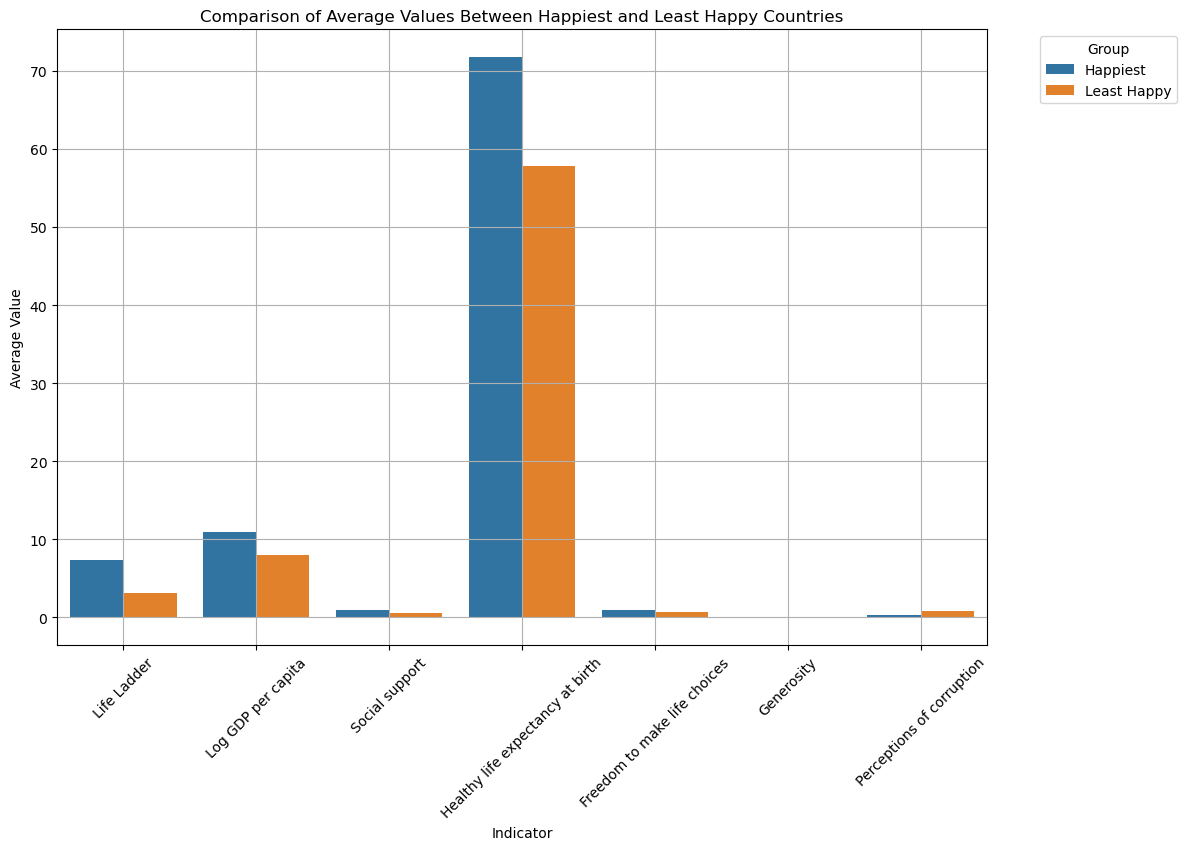

In [117]:
plt.figure(figsize=(12, 8))
sns.barplot(x='variable', y='value', hue='Group', data=comparison_melted, ci=None)
plt.title('Comparison of Average Values Between Happiest and Least Happy Countries')
plt.xlabel('Indicator')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Identify the 10 countries with most and least life expectancy


In [118]:
life_exp_avg = life_exp_cleaned.groupby('Country')['Life expentancy'].mean().reset_index()

top_10_countries = life_exp_avg.nlargest(10, 'Life expentancy')
bottom_10_countries = life_exp_avg.nsmallest(10, 'Life expentancy')

# Filter data for the top 10 and bottom 10 countries
top_10_subset = life_exp_cleaned[life_exp_cleaned['Country'].isin(top_10_countries['Country'])]
bottom_10_subset = life_exp_cleaned[life_exp_cleaned['Country'].isin(bottom_10_countries['Country'])]


print("Top 10 Countries:\n", top_10_countries)
print('\n')
print("Bottom 10 Countries:\n", bottom_10_countries)

Top 10 Countries:
         Country  Life expentancy
26        Japan        84.583333
27        Korea        83.550000
44  Switzerland        83.466667
1     Australia        83.283333
34       Norway        83.022222
42        Spain        82.955556
43       Sweden        82.877778
20      Iceland        82.822222
24       Israel        82.722222
25        Italy        82.644444


Bottom 10 Countries:
          Country  Life expentancy
41  South Africa        64.488889
22     Indonesia        68.988889
21         India        69.477778
5       Bulgaria        73.200000
4         Brazil        74.055556
35          Peru        74.122222
38       Romania        74.177778
28        Latvia        74.400000
29     Lithuania        75.066667
31        Mexico        75.300000


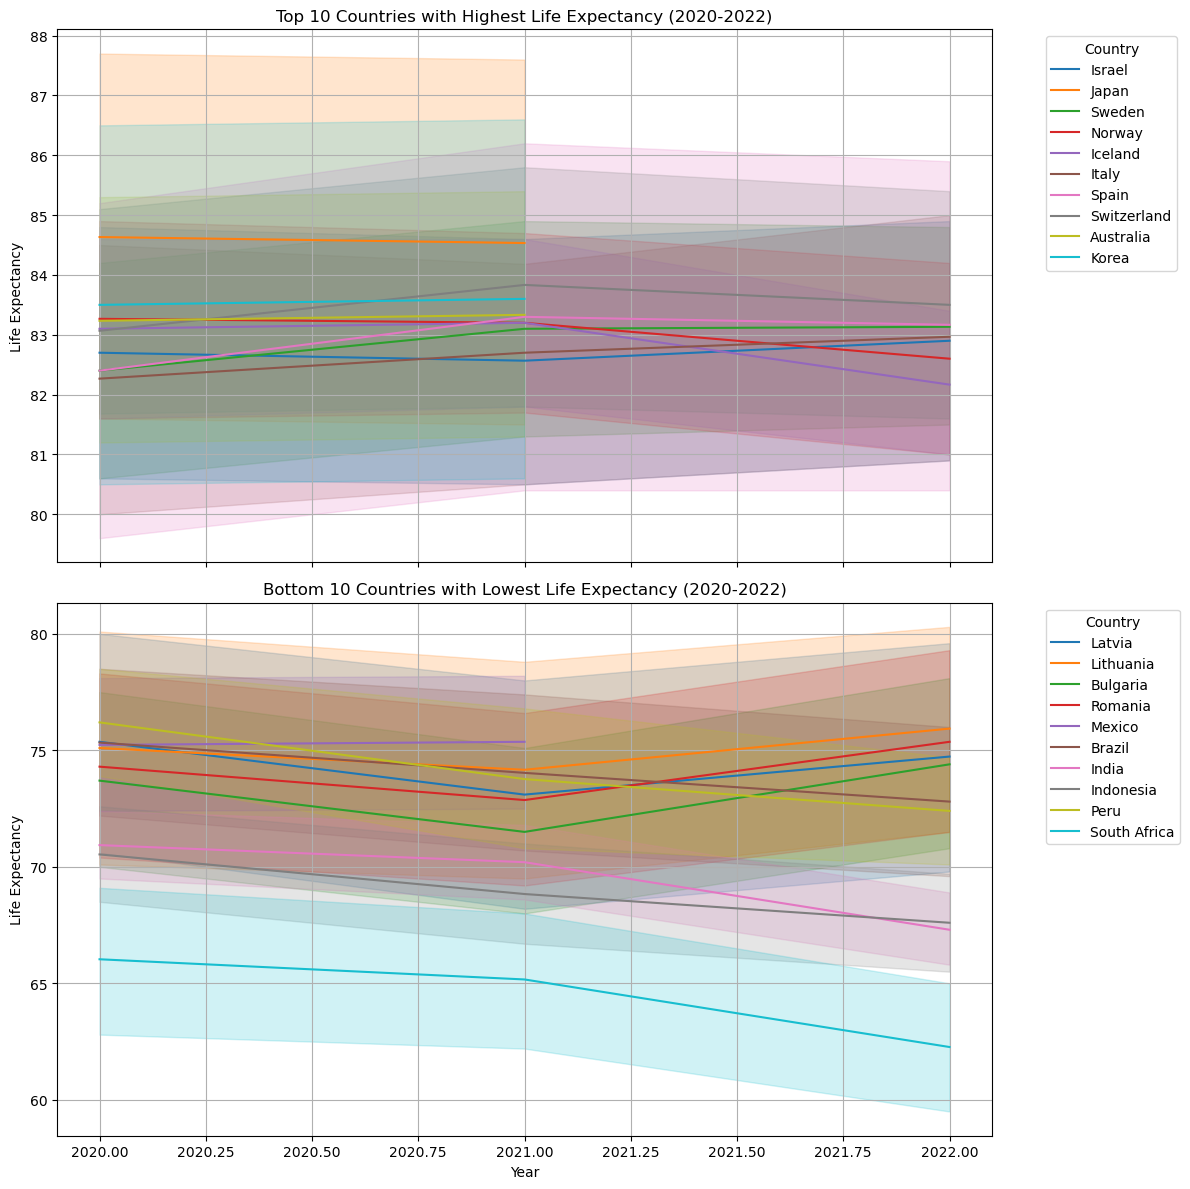

In [119]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot for the top 10 countries
sns.lineplot(data=top_10_subset, x='Year', y='Life expentancy', hue='Country', ax=axes[0])
axes[0].set_title('Top 10 Countries with Highest Life Expectancy (2020-2022)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Life Expectancy')
axes[0].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True)

# Plot for the bottom 10 countries
sns.lineplot(data=bottom_10_subset, x='Year', y='Life expentancy', hue='Country', ax=axes[1])
axes[1].set_title('Bottom 10 Countries with Lowest Life Expectancy (2020-2022)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Life Expectancy')
axes[1].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Identify the top and buttom 10 countries GDP

In [120]:
gdp_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CountryCode    229 non-null    object
 1   Ranking        214 non-null    object
 2   Country        229 non-null    object
 3   GDP(millions)  229 non-null    object
dtypes: object(4)
memory usage: 10.3+ KB


In [121]:
# Replace commas and convert to numeric, forcing errors to NaN
gdp_cleaned['GDP(millions)'] = gdp_cleaned['GDP(millions)'].str.replace(',', '', regex=False)

# Handle non-numeric values by coercing them to NaN
gdp_cleaned['GDP(millions)'] = pd.to_numeric(gdp_cleaned['GDP(millions)'], errors='coerce')
gdp_cleaned = gdp_cleaned.dropna(subset=['GDP(millions)'])


In [122]:
gdp_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 233
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryCode    223 non-null    object 
 1   Ranking        211 non-null    object 
 2   Country        223 non-null    object 
 3   GDP(millions)  223 non-null    float64
dtypes: float64(1), object(3)
memory usage: 8.7+ KB


In [123]:
gdp_avg = gdp_cleaned.groupby('Country')['GDP(millions)'].mean().reset_index()

# Identify the top 10 and bottom 10 countries
top_10_gdp_countries = gdp_avg.nlargest(10, 'GDP(millions)')
bottom_10_gdp_countries = gdp_avg.nsmallest(10, 'GDP(millions)')

# subsets
top_10_gdp_subset = gdp_cleaned[gdp_cleaned['Country'].isin(top_10_gdp_countries['Country'])]
bottom_10_gdp_subset = gdp_cleaned[gdp_cleaned['Country'].isin(bottom_10_gdp_countries['Country'])]

print("Top 10 Countries by GDP:\n", top_10_gdp_countries)
print('\n')
print("Bottom 10 Countries by GDP:\n", bottom_10_gdp_countries)

Top 10 Countries by GDP:
                        Country  GDP(millions)
219                      World    100879561.0
84                 High income     61729512.0
56         East Asia & Pacific     30712490.0
212        Upper middle income     30110930.0
148              North America     27608729.0
211              United States     25439700.0
64       Europe & Central Asia     25344210.0
40                       China     17963171.0
117        Lower middle income      8171521.0
108  Latin America & Caribbean      6302490.0


Bottom 10 Countries by GDP:
                       Country  GDP(millions)
205                    Tuvalu           59.0
140                     Nauru          152.0
102                  Kiribati          223.0
154                     Palau          233.0
126          Marshall Islands          259.0
130     Micronesia, Fed. Sts.          424.0
200                     Tonga          469.0
194     São Tomé and Principe          543.0
54                   Dominica   

# Predictive Modeling

## Objective:
Predict happiness scores using other variables.

## Prepare Data for Modeling

Combine relevant data and handle missing values

In [129]:
data_combined = pd.merge(happiness_cleaned, life_exp_cleaned, how='left', left_on=['Country name', 'year'], right_on=['Country', 'Year'])
data_combined.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,CountryCode,Country,Year,Life expentancy
0,Afghanistan,2021,2.436,7.324,0.454,54.550,0.394,-0.081,0.946,NaN,NaN,NaN,NaN
1,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,NaN,NaN,NaN,NaN
2,Albania,2020,5.365,9.492,0.710,69.125,0.754,0.004,0.891,NaN,NaN,NaN,NaN
3,Albania,2021,5.255,9.583,0.702,69.150,0.827,0.041,0.896,NaN,NaN,NaN,NaN
4,Albania,2022,5.212,9.626,0.724,69.175,0.802,-0.066,0.846,NaN,NaN,NaN,NaN


In [131]:
data_combined = pd.merge(data_combined, gdp_cleaned, how='left', left_on='Country name', right_on='Country')
data_combined.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,CountryCode_x,Country_x,Year,Life expentancy,CountryCode_y,Ranking,Country_y,GDP(millions)
0,Afghanistan,2021,2.436,7.324,0.454,54.550,0.394,-0.081,0.946,NaN,NaN,NaN,NaN,AFG,138,Afghanistan,14266.0
1,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,NaN,NaN,NaN,NaN,AFG,138,Afghanistan,14266.0
2,Albania,2020,5.365,9.492,0.710,69.125,0.754,0.004,0.891,NaN,NaN,NaN,NaN,ALB,122,Albania,18916.0
3,Albania,2021,5.255,9.583,0.702,69.150,0.827,0.041,0.896,NaN,NaN,NaN,NaN,ALB,122,Albania,18916.0
4,Albania,2022,5.212,9.626,0.724,69.175,0.802,-0.066,0.846,NaN,NaN,NaN,NaN,ALB,122,Albania,18916.0


In [133]:
data_combined = data_combined.drop(columns=['Country_x', 'Country_y',
                                            'CountryCode_x',
                                           'Year'])
data_combined.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Life expentancy,CountryCode_y,Ranking,GDP(millions)
0,Afghanistan,2021,2.436,7.324,0.454,54.550,0.394,-0.081,0.946,NaN,AFG,138,14266.0
1,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,NaN,AFG,138,14266.0
2,Albania,2020,5.365,9.492,0.710,69.125,0.754,0.004,0.891,NaN,ALB,122,18916.0
3,Albania,2021,5.255,9.583,0.702,69.150,0.827,0.041,0.896,NaN,ALB,122,18916.0
4,Albania,2022,5.212,9.626,0.724,69.175,0.802,-0.066,0.846,NaN,ALB,122,18916.0


In [135]:
data_combined.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   10
Social support                        0
Healthy life expectancy at birth      9
Freedom to make life choices          3
Generosity                           10
Perceptions of corruption            12
Life expentancy                     232
CountryCode_y                        50
Ranking                              50
GDP(millions)                        50
dtype: int64

In [136]:
# Fill missing values in 'Life Expectancy' with the median
data_combined['Life expentancy'] = data_combined['Life expentancy'].fillna(data_combined['Life expentancy'].median())

data_combined = data_combined.dropna()

In [137]:
# Define the features and target
X = data_combined[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Life expentancy', 'GDP(millions)']]
y = data_combined['Life Ladder']


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.19332101143210437
R-squared: 0.8596146324570951


### The model performs good

- It has a high R-squared value of 86% of the variance in the happiness scores

- The Mean Squared Error (MSE) is 0.19

### Model Coefficients


In [139]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                   Coefficient
Log GDP per capita                2.562128e-01
Social support                    4.291938e+00
Healthy life expectancy at birth  2.078330e-02
Freedom to make life choices      1.588346e+00
Generosity                       -6.484690e-02
Perceptions of corruption        -8.622320e-01
Life expentancy                   1.665015e-02
GDP(millions)                     9.844031e-09


## Visualize Model Performance


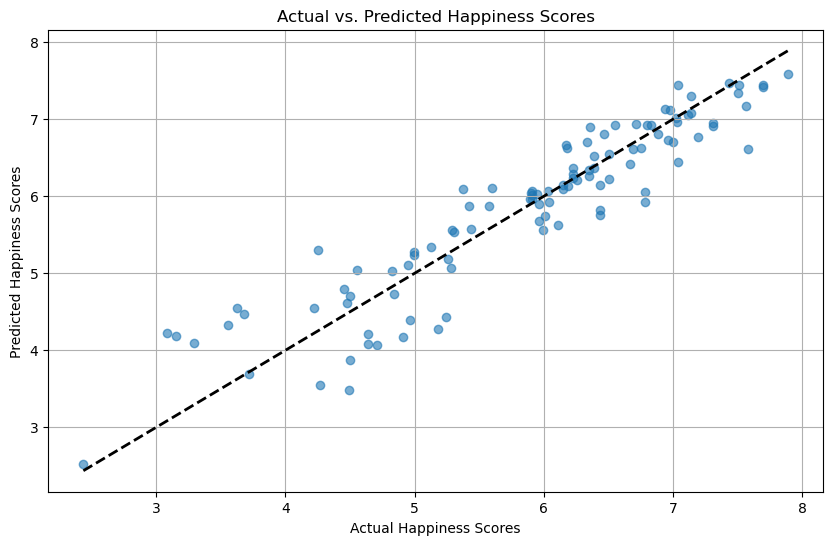

In [140]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Happiness Scores')
plt.ylabel('Predicted Happiness Scores')
plt.title('Actual vs. Predicted Happiness Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

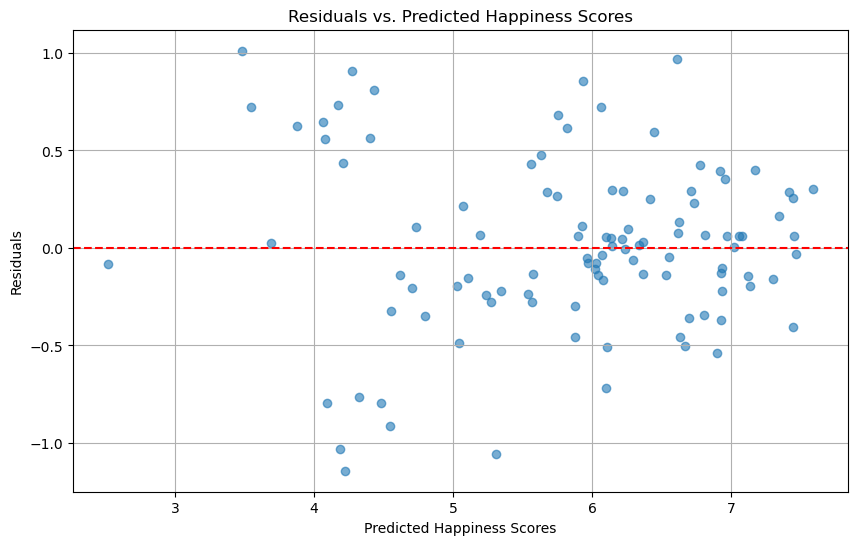

In [141]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.xlabel('Predicted Happiness Scores')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Happiness Scores')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()


# Impact of Individual Factors on Happiness

## Objective:
Assess the impact of individual factors like GDP, social support, and life expectancy on happiness.

In [143]:
import statsmodels.api as sm

happiness_data = happiness_cleaned[['Life Ladder', 'Log GDP per capita', 'Social support',
                                    'Healthy life expectancy at birth',
                                    'Freedom to make life choices', 'Generosity',
                                    'Perceptions of corruption']].dropna()

X = happiness_data[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = happiness_data['Life Ladder']

# Add a constant (intercept)
X = sm.add_constant(X)


In [144]:
# Perform multiple regression analysis
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     218.5
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          2.91e-109
Time:                        19:34:24   Log-Likelihood:                -233.56
No. Observations:                 323   AIC:                             481.1
Df Residuals:                     316   BIC:                             507.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Multiple LR Results

#### Positive Impact:
- Log GDP per capita (0.256): Significant (p-value = 0.010)
- Social support (4.292): Highly significant (p-value = 0.000)
- Freedom to make life choices (1.588): Highly significant (p-value = 0.000)

#### Negative Impact:
- Perceptions of corruption (-0.862): Highly significant (p-value = 0.000)

#### Not Significant:
- Healthy life expectancy at birth (0.021): Not significant (p-value = 0.107)
- Generosity (-0.065): Not significant (p-value = 0.334)

# Preparing Files for Export to Tableau


In [154]:
import os

# Define the directory to save the files
save_directory = '/Users/fernandoalatorrealexander/Desktop/Potfolio Projects'

# Ensure the directory exists
os.makedirs(save_directory, exist_ok=True)

# Export happiness_cleaned to CSV
happiness_cleaned.to_csv(os.path.join(save_directory, 'happiness_cleaned.csv'), index=False)

# Export life_exp_cleaned to CSV
life_exp_cleaned.to_csv(os.path.join(save_directory, 'life_exp_cleaned.csv'), index=False)

# Ensure GDP data is clean and numeric
gdp_cleaned['GDP(millions)'] = gdp_cleaned['GDP(millions)'].astype(str).str.replace(',', '', regex=False).astype(float)

# Export gdp_cleaned to CSV
gdp_cleaned.to_csv(os.path.join(save_directory, 'gdp_cleaned.csv'), index=False)

# Export wellbeing_cleaned to CSV
wellbeing_cleaned.to_csv(os.path.join(save_directory, 'wellbeing_cleaned.csv'), index=False)

print(f"Files have been saved to {save_directory}")

Files have been saved to /Users/fernandoalatorrealexander/Desktop/Potfolio Projects


# Findings

### Top Countries by GDP:

Countries with the highest GDP include the United States, China, and regions like North America.

### Bottom Countries by GDP:

Small island nations like Tuvalu and Nauru have the lowest GDP.
Factors Influencing Happiness:

- Positive Impacts:
    Higher GDP per capita, strong social support, freedom to make life choices

- Negative Impact:
    Perceptions of corruption

# Recommendations to Increase Happiness:

- Enhance Social Support:
      Invest in community services and support networks.

- Boost Economic Opportunities:
    Create jobs and improve wages.

- Promote Personal Freedom:
    Implement policies that empower individuals and increase personal autonomy.

- Combat Corruption:
    Strengthen anti-corruption measures and improve transparency.

# Conclusion

### Improving happiness at a national level involves a multifaceted approach. By enhancing social support systems, increasing economic opportunities, promoting personal freedom, and combating corruption, countries can create environments where citizens feel happier and more fulfilled. Implementing these recommendations can lead to a significant positive impact on the overall well-being and happiness of the population.